In [16]:
import json
import pandas as pd
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format

def extract_benchmark_method(benchmark):
    return benchmark.split('.')[-1]

def load_results(file_name):
    with open(f'results/{file_name}') as file:
        results = json.load(file)
        scores_raw = [(extract_benchmark_method(i['benchmark']),i['params']['size'],i['primaryMetric']['score']) for i in results]
        scores = pd.DataFrame(data=scores_raw,columns=['benchmark','size','score'])
        max_scores_by_size = scores.groupby(['size']).max()
        scores_pct = scores.join(max_scores_by_size,on='size',rsuffix='_max').drop(columns='benchmark_max')
        scores_pct['score_pct'] = scores_pct['score'].divide(scores_pct['score_max']).multiply(100)
        labels = {'score_pct':'Score %','benchmark':'Benchmark','size':'List size'}
        chart = px.bar(data_frame = scores_pct,x = 'benchmark', y='score_pct', color='size',barmode='group', labels = labels)

        return (scores_pct,chart)

# Integers sum

In [17]:
benchmark = 'benchmark-streams-sum-int'
(scores,chart) = load_results(f'{benchmark}.json')

In [18]:
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"428,684.11","1,900,634.10",22.55
1,collect,10000,"45,097.11","174,295.16",25.87
2,collect,100000,"2,801.49","16,591.81",16.88
3,collect,1000000,252.77,"1,334.48",18.94
4,collectPar,1000,"198,165.75","1,900,634.10",10.43
5,collectPar,10000,"35,696.77","174,295.16",20.48
6,collectPar,100000,"11,798.04","16,591.81",71.11
7,collectPar,1000000,"1,334.48","1,334.48",100.00
8,forEach,1000,"1,900,634.10","1,900,634.10",100.00
9,forEach,10000,"174,295.16","174,295.16",100.00


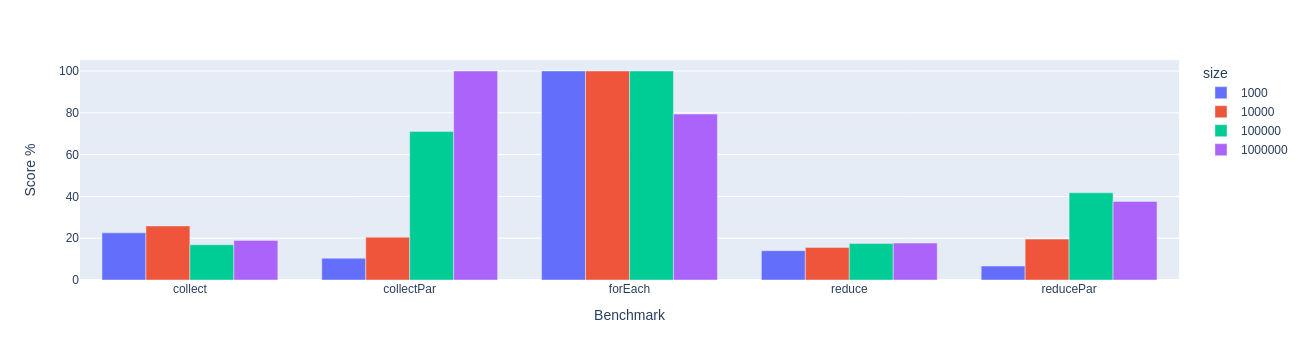

In [20]:
chart.write_image(f'img/{benchmark}.png',width='700')
chart